In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
np.random.seed(120)
random.seed(120)

In [ ]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [ ]:
X, y = prepare_market_data_for_model("eth_merged.csv", base_path, horizon=12*12)

In [ ]:
X

,price_over_ema4h,price_over_ema2h,volatility_4h,volatility_wh,volume_z,s_t,log_return_t-1
timestamp,,,,,,,
2025-04-12 00:05:00+00:00,-0.001266,-0.000558,0.001403,0.002159,-0.537620,0.002159,-0.001262
2025-04-12 00:10:00+00:00,-0.002423,-0.001673,0.001412,0.002160,-0.520829,0.002160,0.001334
2025-04-12 00:15:00+00:00,-0.001047,-0.000314,0.001422,0.002152,-0.258105,0.002152,-0.001578
2025-04-12 00:20:00+00:00,-0.002516,-0.001739,0.001440,0.002154,-0.556829,0.002154,-0.000416
2025-04-12 00:25:00+00:00,-0.002812,-0.001983,0.001397,0.002153,-0.466902,0.002153,0.000338
...,...,...,...,...,...,...,...
2025-06-06 11:35:00+00:00,0.002228,-0.000398,0.001209,0.002422,0.300042,0.002422,-0.000962
2025-06-06 11:40:00+00:00,0.001213,-0.001250,0.001193,0.002422,-0.517769,0.002422,0.000448
2025-06-06 11:45:00+00:00,0.001593,-0.000739,0.001193,0.002423,-0.593206,0.002423,-0.000368


In [ ]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.8392 - val_loss: 0.8508 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7252 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6948 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6775 - val_loss: 0.8755 - learning_rate: 5.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6966 - val_loss: 0.8780 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6905 - val_loss: 0.8792 - learning_rate: 2.5000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6739 - val_loss: 0.8836 - learning_rate: 2.5000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6657 - val_loss: 0.8855 - learning_rate: 1.2500e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6680 - val_loss: 0.8875 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


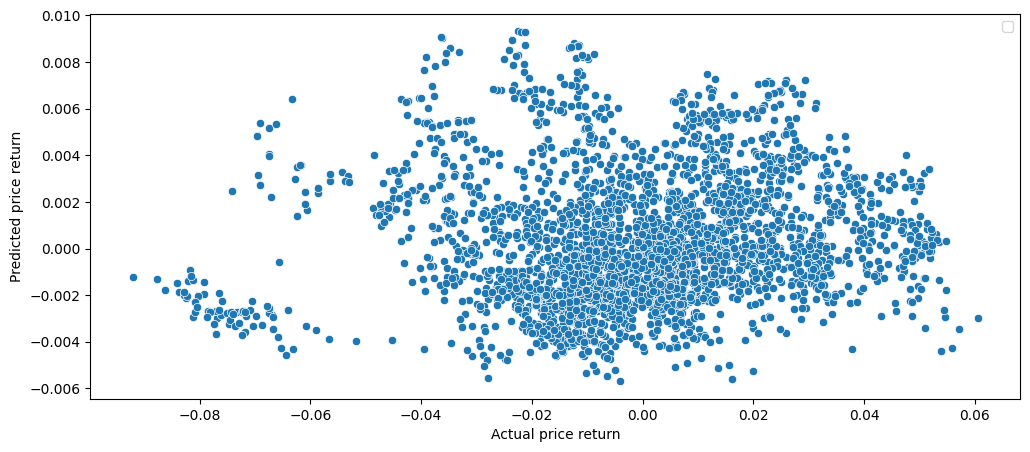

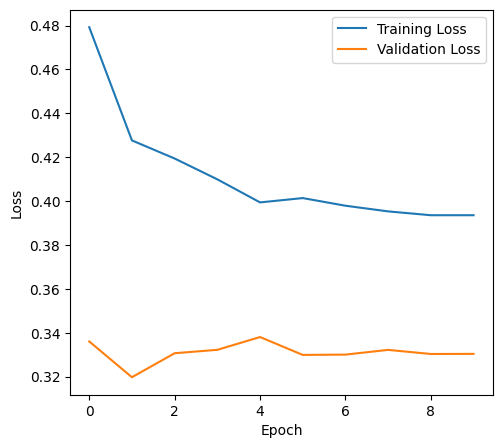

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009042177116498351
mean CV MAE: 0.02127748914062977
mean CV DA: 0.5295938104448743
mean CV SR: 0.09197069329272747
mean CV R^2: -0.130330491065979
mean CV Pearson correlation: 0.03718716651201248


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


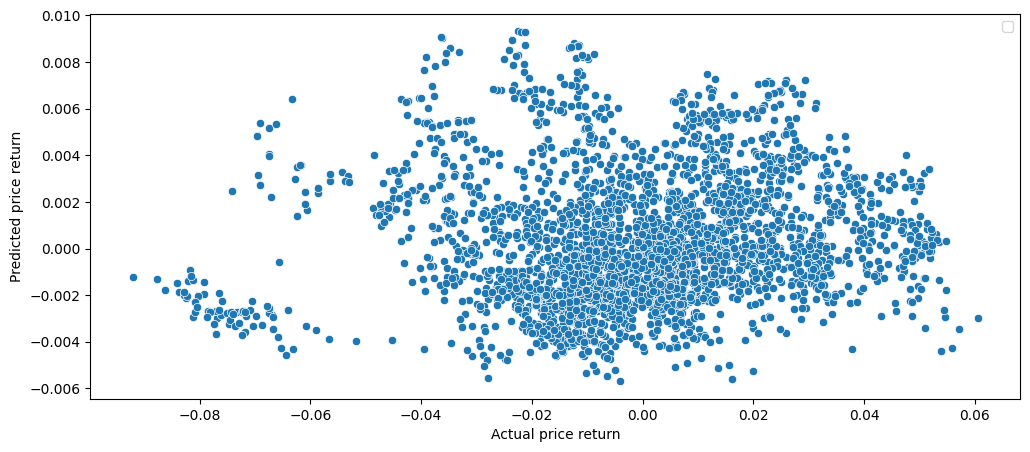

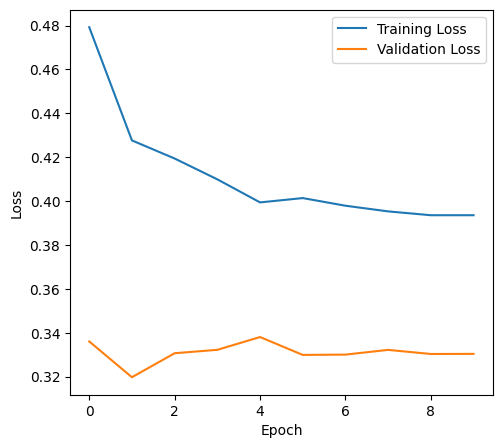

successfully saved training's output to lstm_eth_scores_1_1.json


In [ ]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_1_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.8743 - val_loss: 0.8902 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7902 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7804 - val_loss: 0.8819 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7403 - val_loss: 0.8952 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7265 - val_loss: 0.8950 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7413 - val_loss: 0.8954 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7025 - val_loss: 0.8976 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7045 - val_loss: 0.8986 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7037 - val_loss: 0.9002 - learning_rate: 2.500

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


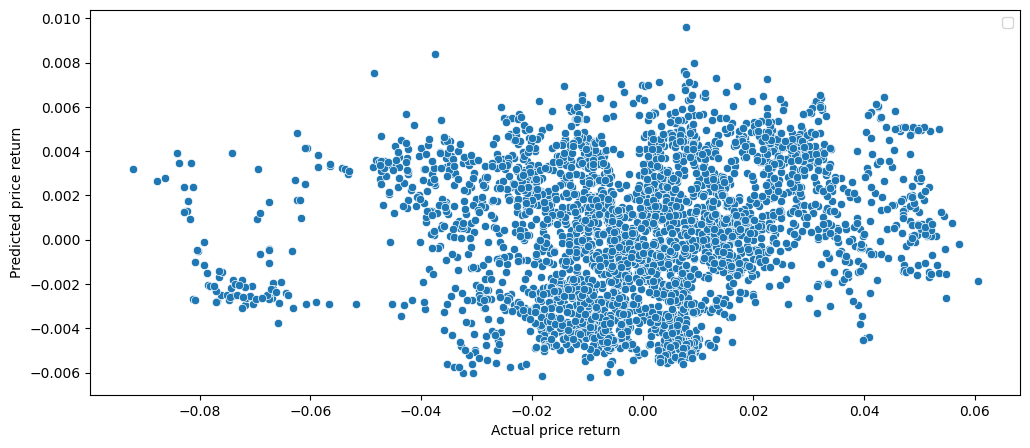

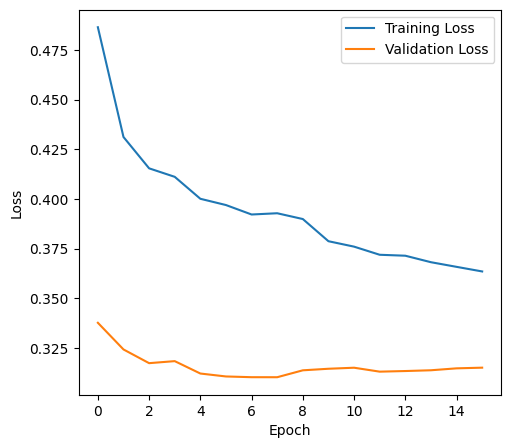

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008961331914179027
mean CV MAE: 0.021421972662210464
mean CV DA: 0.5049323017408124
mean CV SR: 0.05441910644118477
mean CV R^2: -0.11478114128112793
mean CV Pearson correlation: 0.04289741814136505


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


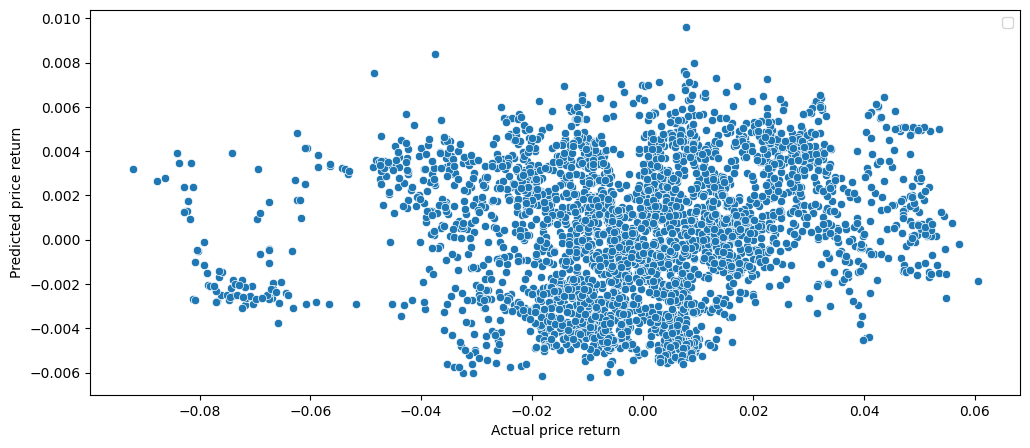

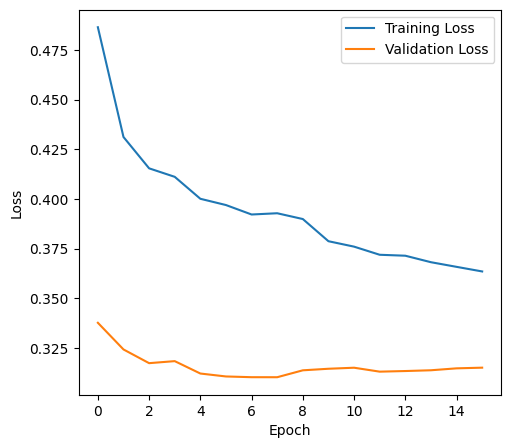

successfully saved training's output to lstm_eth_scores_2_1.json


In [ ]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_2_1.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.0108 - val_loss: 1.1587 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9102 - val_loss: 0.8954 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8219 - val_loss: 0.8850 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7775 - val_loss: 0.8772 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7600 - val_loss: 0.8435 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.7570 - val_loss: 0.8648 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7323 - val_loss: 0.8730 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.7194 - val_loss: 0.8903 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.7057 - val_loss: 0.8904 - learning_rate: 0.0010
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


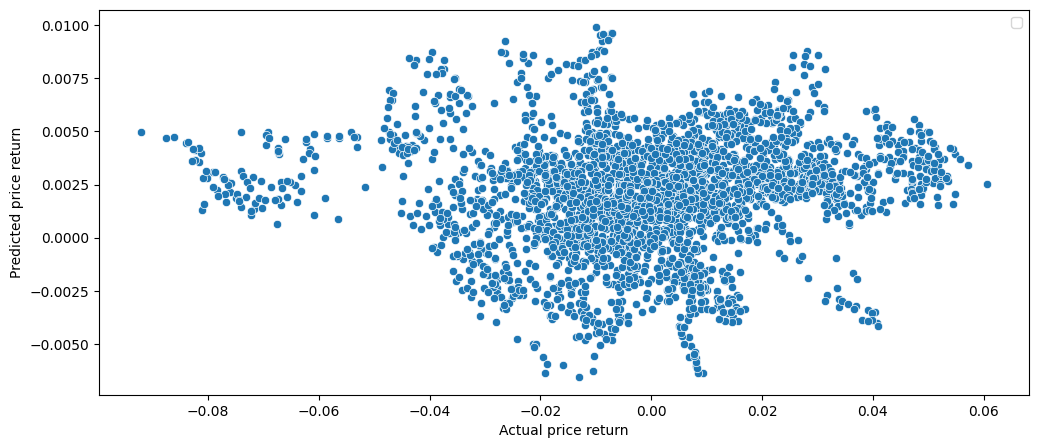

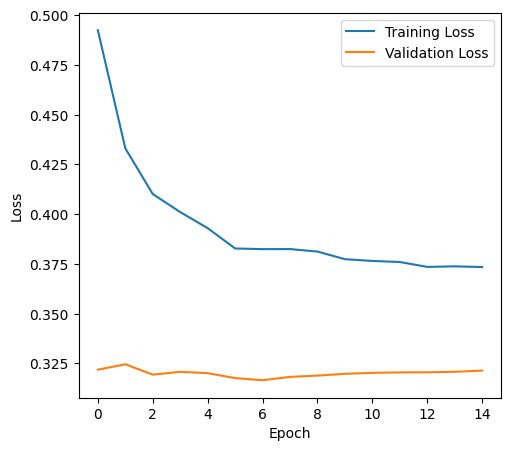

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008665922214277089
mean CV MAE: 0.02093106508255005
mean CV DA: 0.5270793036750483
mean CV SR: 0.12165142312212851
mean CV R^2: -0.08319162130355835
mean CV Pearson correlation: 0.06830302625894547


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


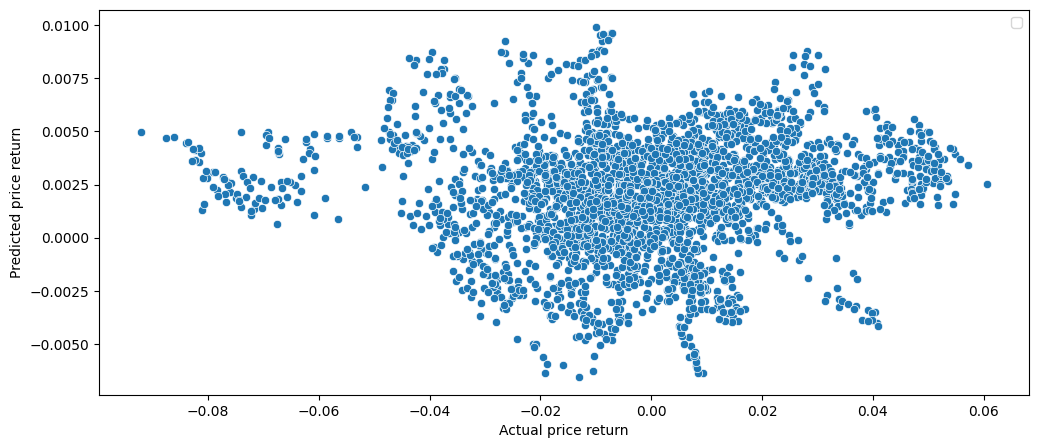

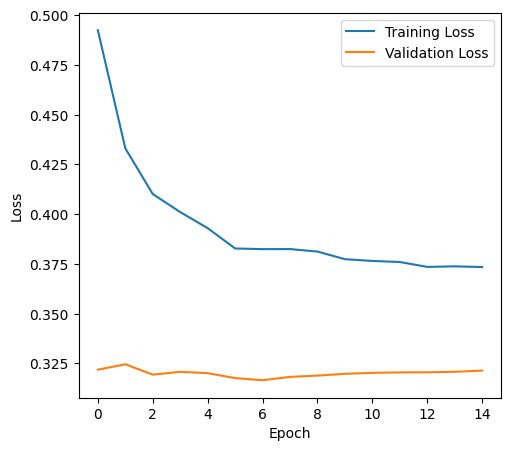

successfully saved training's output to lstm_eth_scores_3_1.json


In [ ]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.8302 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7907 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7447 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.7453 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7280 - val_loss: 0.8242 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.7127 - val_loss: 0.8321 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7186 - val_loss: 0.8355 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7264 - val_loss: 0.8325 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7066 - val_loss: 0.8284 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


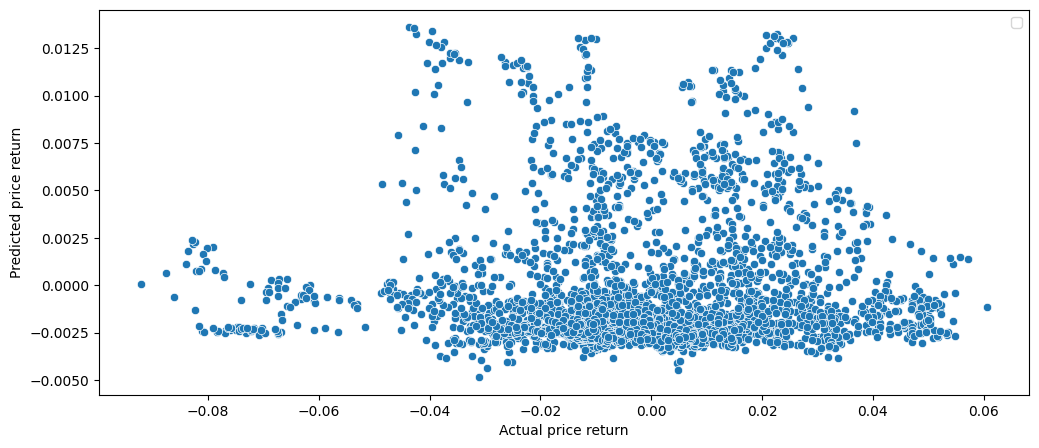

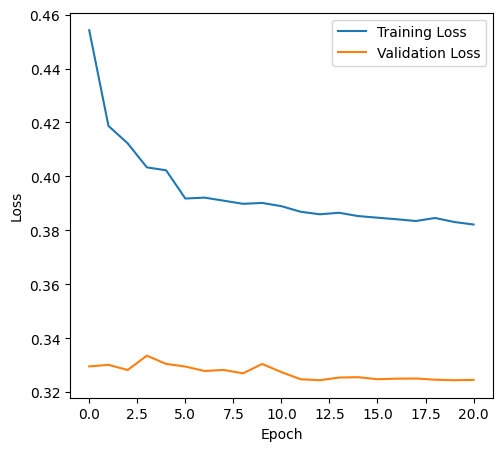

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008812742307782173
mean CV MAE: 0.020924922078847885
mean CV DA: 0.5620889748549324
mean CV SR: 0.16239048557686048
mean CV R^2: -0.08352916240692139
mean CV Pearson correlation: 0.13714994490146637


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


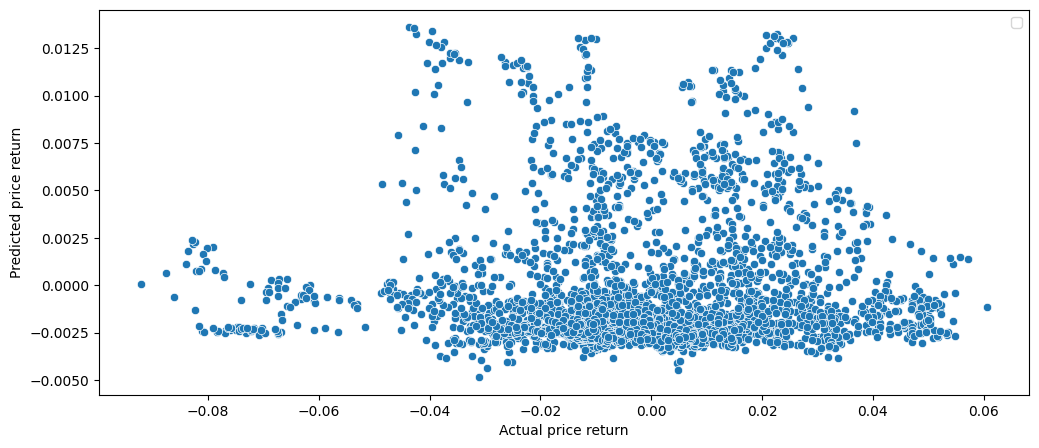

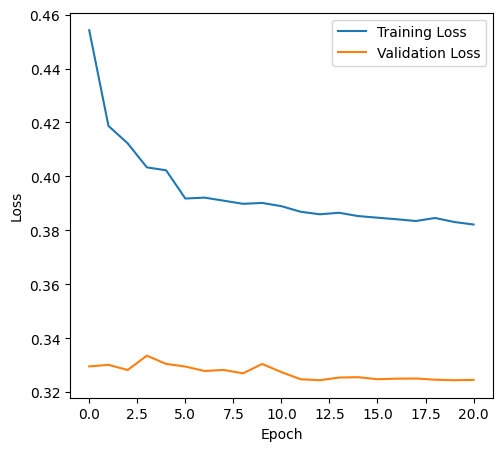

successfully saved training's output to gru_eth_scores_1_1.json


In [ ]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_1_1.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.8859 - val_loss: 0.9180 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8597 - val_loss: 0.8568 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8049 - val_loss: 0.8689 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7285 - val_loss: 0.8913 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7468 - val_loss: 0.8808 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7325 - val_loss: 0.8825 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7022 - val_loss: 0.8826 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7142 - val_loss: 0.8816 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7117 - val_loss: 0.8808 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


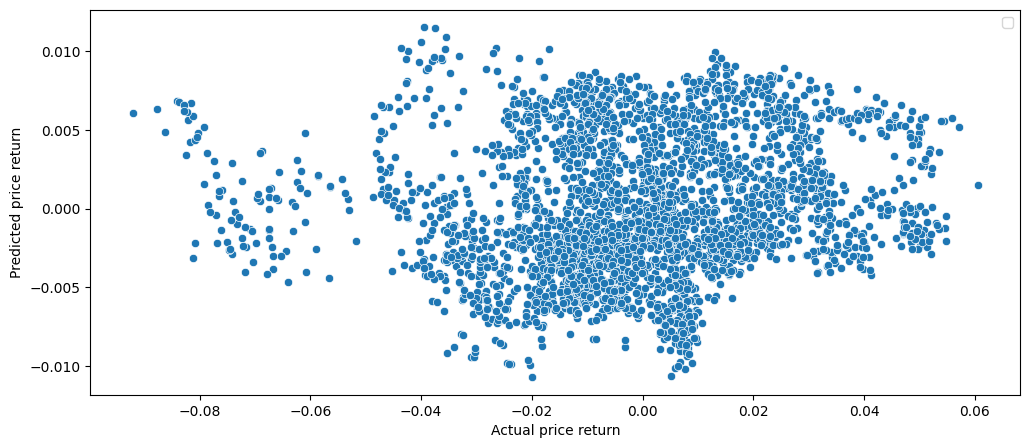

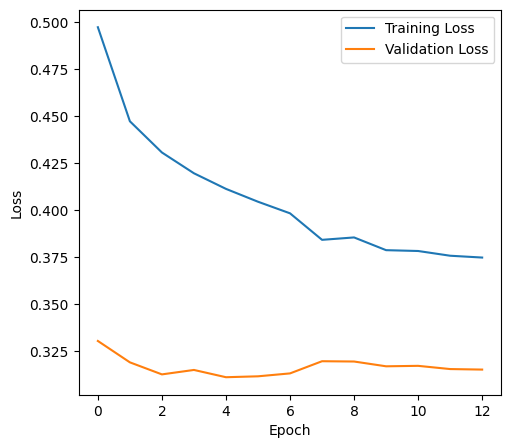

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000910205882973969
mean CV MAE: 0.02132324129343033
mean CV DA: 0.5334622823984526
mean CV SR: 0.09219419140832934
mean CV R^2: -0.12676695585250855
mean CV Pearson correlation: 0.020007267594337463


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


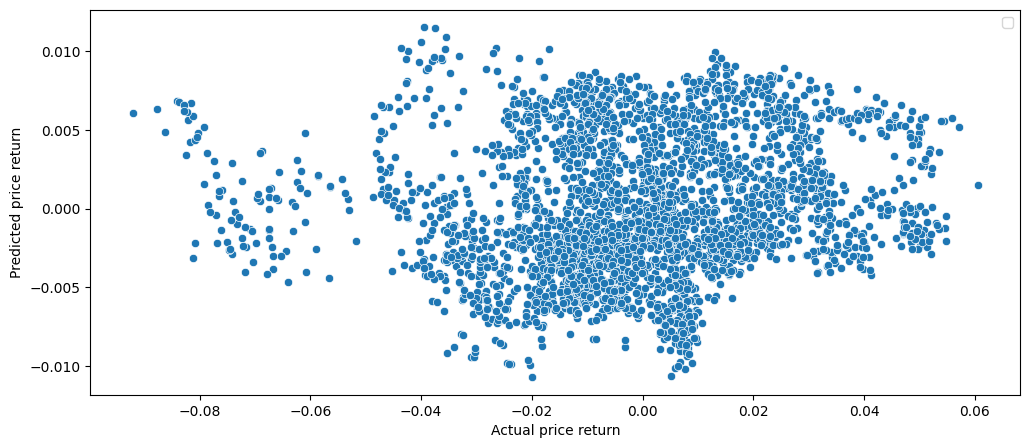

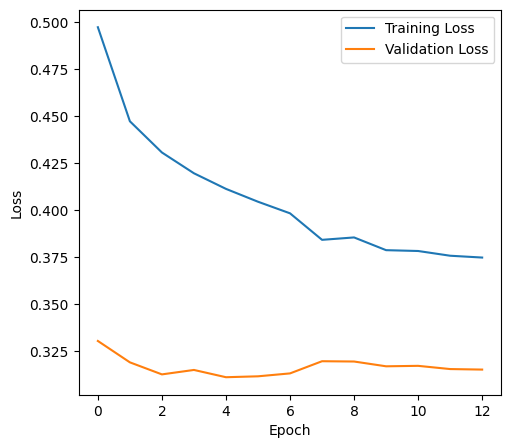

successfully saved training's output to gru_eth_scores_2_1.json


In [ ]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_2_1.json", dropout=0.2, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.2259 - val_loss: 1.1490 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9813 - val_loss: 1.0630 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9476 - val_loss: 1.0137 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9071 - val_loss: 1.0230 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9061 - val_loss: 0.9645 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8366 - val_loss: 0.9658 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8122 - val_loss: 0.9740 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7422 - val_loss: 0.9892 - learning_rate: 0.0010
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7080 - val_loss: 0.9321 - learning_rate: 0.0010
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


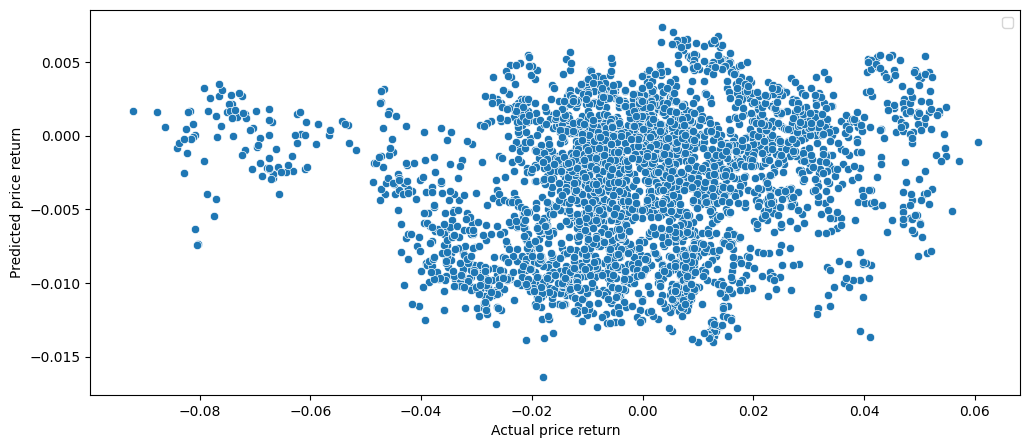

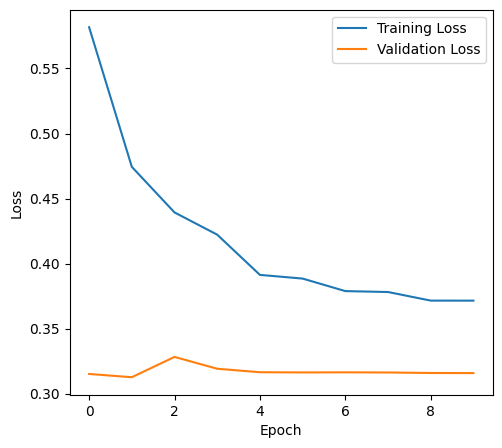

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008743090438656509
mean CV MAE: 0.021043015643954277
mean CV DA: 0.5357833655705996
mean CV SR: 0.11091983244967114
mean CV R^2: -0.0847172737121582
mean CV Pearson correlation: 0.10701271146535873


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


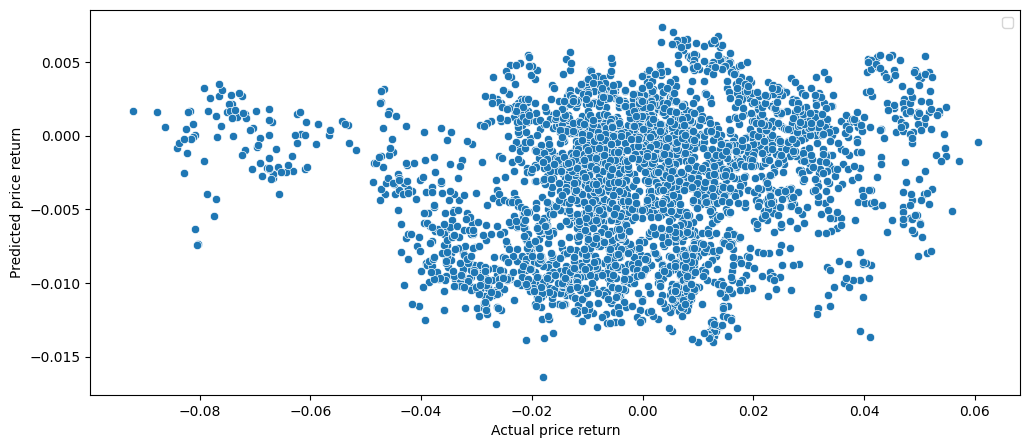

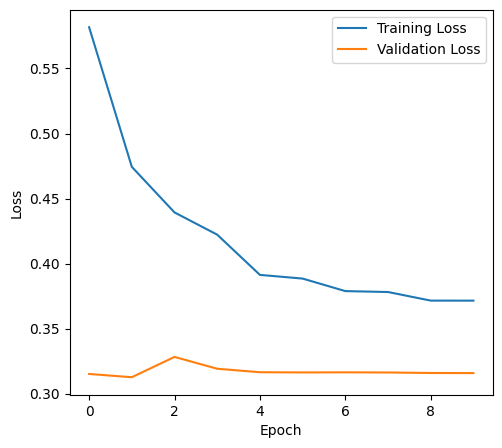

successfully saved training's output to gru_eth_scores_3_1.json


In [11]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_3_1.json", dropout=0.2, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 1] mse: 0.000961552 | mae: 0.0222143 | da: 0.575 | sr: -0.011


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 2] mse: 0.000166873 | mae: 0.010233 | da: 0.520 | sr: 0.038


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 3] mse: 0.00337249 | mae: 0.0404505 | da: 0.470 | sr: -0.458


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 4] mse: 0.00107105 | mae: 0.0257899 | da: 0.457 | sr: -0.059


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 5] mse: 0.000843339 | mae: 0.0232667 | da: 0.445 | sr: -0.030


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[FINAL TEST] mse: 0.000616392 | mae: 0.0186408 | da: 0.532 | sr: 0.065 | r_squared: -0.120 | corr: 0.037


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


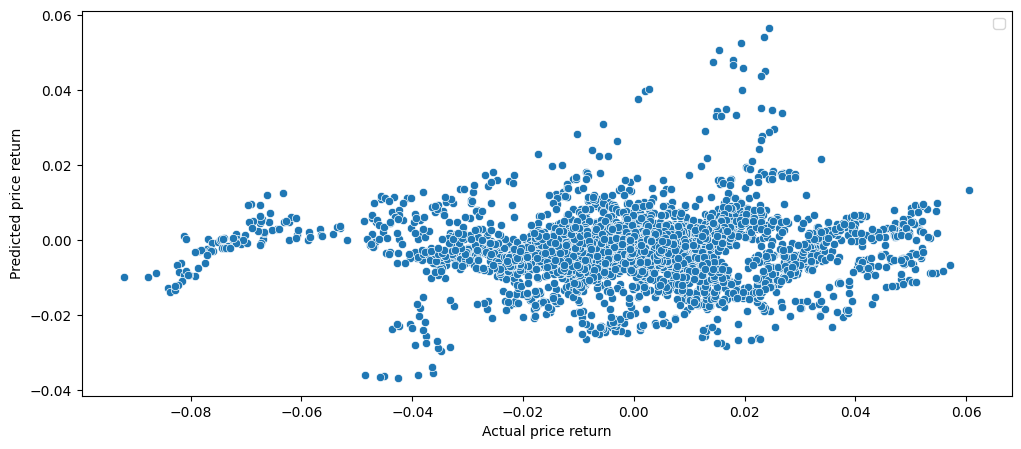

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0012830607324730492
mean CV MAE: 0.024390879680158035
mean CV DA: 0.4933833880807133
mean CV SR: -0.10384880965330949
mean CV R^2: -0.4519287217467253
mean CV Pearson correlation: -0.0567325799460348


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


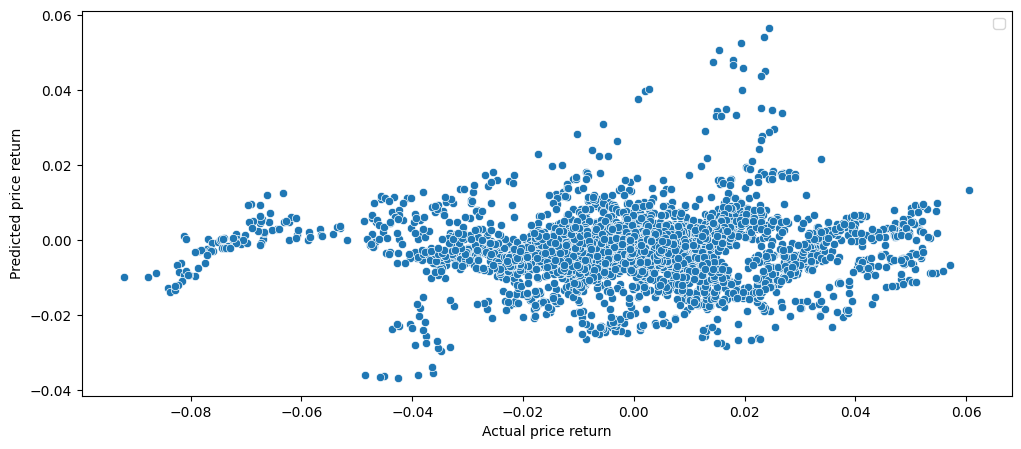

successfully saved training's output to arima_eth_scores_1_1.json


In [ ]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_eth_scores_1_1.json", epochs=100)